## Python statistics essential training - 04_02_confidenceintervals

Standard imports

In [1]:
import math
import io

In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [3]:
import scipy.stats
import scipy.optimize
import scipy.spatial

In [4]:
poll = pd.read_csv('poll.csv')

In [5]:
poll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   vote    1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [6]:
poll.head()

,vote
0,Brown
1,Green
2,Brown
3,Brown
4,Brown


In [9]:
poll.vote.value_counts(normalize=True)

Brown    0.511
Green    0.489
Name: vote, dtype: float64

In [23]:
A=0.7
np.where(A<0.51,'Brown','Green')

array('Green', dtype='<U5')

In [22]:
np.where(np.random.rand(5)<0.51,'Brown','Green')

array(['Green', 'Green', 'Brown', 'Brown', 'Brown'], dtype='<U5')

In [28]:
def sample(brown,n=1000):
    return pd.DataFrame({'vote':np.where(np.random.rand(n)<brown, 'Brown','Green')})

In [30]:
s = sample(0.51,n=1000)

In [31]:
s.value_counts(normalize=True)

vote 
Brown    0.504
Green    0.496
dtype: float64

In [36]:
dist = pd.DataFrame([sample(0.51).vote.value_counts(normalize=True) for i in range(1000) ])

In [37]:
dist.head()

,Green,Brown
vote,0.512,0.488
vote,0.478,0.522
vote,0.456,0.544
vote,0.503,0.497
vote,0.530,0.470


<AxesSubplot:>

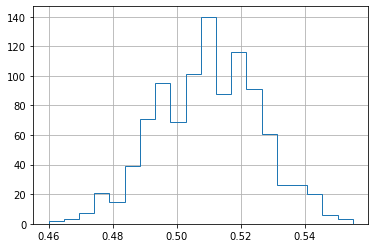

In [38]:
dist.Brown.hist(histtype='step',bins=20)

In [39]:
def samplingdist(brown,n=1000):
    return pd.DataFrame([sample(brown,n).vote.value_counts(normalize=True) for i in range(1000) ])

In [43]:
def quantiles(brown,n=1000):
    dist = samplingdist(brown,n)
    return dist.Brown.quantile(0.25), dist.Brown.quantile(0.975)

In [44]:
quantiles(0.50)

(0.49075, 0.532)

In [45]:
quantiles(0.48)

(0.469, 0.51)

In [46]:
quantiles(0.54)

(0.528, 0.568)

In [48]:
dist = samplingdist(0.5,n=10000)

<AxesSubplot:>

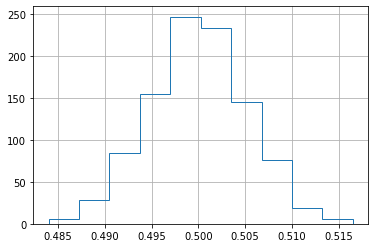

In [49]:
dist.Brown.hist(histtype='step')

In [50]:
largepoll = pd.read_csv('poll-larger.csv')

In [51]:
largepoll.vote.value_counts(normalize=True)

Green    0.5181
Brown    0.4819
Name: vote, dtype: float64